RobustSAMの定義

In [2]:
%cd ./RobustSAM_original


c:\Users\gotol\Documents\nagami\RobustSAM\RobustSAM_original


In [3]:
import argparse
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw
import numpy as np
import cv2
import os
import torch
import torch.nn as nn

from robust_segment_anything_original import SamPredictor, sam_model_registry
from robust_segment_anything_original import SamAutomaticMaskGenerator, sam_model_registry
from robust_segment_anything_original.utils.transforms import ResizeLongestSide

In [4]:
checkpoint_path = '../checkpoints/robustsam_checkpoint_h.pth'
model_type = "vit_h"
device = "cuda"
RobustSAM_model = sam_model_registry[model_type](opt=None, checkpoint=checkpoint_path)
RobustSAM_model.to(device=device)
print('Succesfully loading model from {}'.format(checkpoint_path))

#RobustSAM_predictor= SamPredictor(model)

RobustSAM_predictor= ResizeLongestSide(RobustSAM_model.image_encoder.img_size)


c:\Users\gotol\Documents\nagami\RobustSAM\RobustSAM_original\robust_segment_anything_original\build_sam.py:124: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = to

<All keys matched successfully>
Succesfully loading model from ../checkpoints/robustsam_checkpoint_h.pth


In [5]:
def RobustSAM_predict(image_path, prompt,visualaize = False):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_t = torch.tensor(image, dtype=torch.uint8).unsqueeze(0).to(device)
    image_t = torch.permute(image_t, (0, 3, 1, 2))
    image_t_transformed = RobustSAM_predictor.apply_image_torch(image_t.float())
    if len(prompt)<=3:
          input_label = torch.Tensor(np.ones(prompt.shape[0])).to(device)
          point_t = torch.Tensor(prompt).to(device)
          data_dict = {}
          data_dict['image'] = image_t_transformed
          data_dict['point_coords'] = RobustSAM_predictor.apply_coords_torch(point_t, image_t.shape[-2:]).unsqueeze(0)
          data_dict['point_labels'] = input_label.unsqueeze(0)
          data_dict['original_size'] = image_t.shape[-2:]
    
    else:
           box_t = torch.Tensor(prompt).unsqueeze(0).to(device)
           data_dict = {}
           data_dict['image'] = image_t_transformed
           data_dict['boxes'] = RobustSAM_predictor.apply_boxes_torch(box_t, image_t.shape[-2:]).unsqueeze(0)
           data_dict['original_size'] = image_t.shape[-2:]
    
    with torch.no_grad():
            batched_output = RobustSAM_model.predict(None, [data_dict], multimask_output=True, return_logits=False)
    
    mask = batched_output[0]['masks']
    
    return mask 

In [11]:
import os

current_dir = os.getcwd()
print("現在のディレクトリ:", current_dir)

現在のディレクトリ: c:\Users\gotol\Documents\nagami\RobustSAM\RobustSAM_original


In [12]:
clear_image_path = '../data/all_data/test/clear/#MSRA_100139.jpg'
prompt = np.array([[270., 177.],[210., 159.]])
mask = RobustSAM_predict(clear_image_path, prompt)
image_clear = cv2.imread(clear_image_path)
image_clear = cv2.cvtColor(image_clear, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0, 0].imshow(image_clear)
show_mask(mask[0][0], ax[0, 0])
mask

c:\Users\gotol\anaconda3\Lib\site-packages\torch\nn\modules\instancenorm.py:115: UserWarning: input's size at dim=0 does not match num_features. You can silence this warning by not passing in num_features, which is not used because affine=False
  warnings.warn(


tensor([[[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],

         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],

         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False,

: 

In [ ]:
SAMの定義

In [9]:
%cd c:\Users\gotol\Documents\nagami\RobustSAM\segment-anything
%ls

c:\Users\gotol\Documents\nagami\RobustSAM\segment-anything
 �h���C�u C �̃{�����[�� ���x���� Windows �ł�
 �{�����[�� �V���A���ԍ��� 3263-2B0D �ł�

 c:\Users\gotol\Documents\nagami\RobustSAM\segment-anything �̃f�B���N�g��

2024/12/14  16:36    <DIR>          .
2025/05/04  16:25    <DIR>          ..
2024/12/14  16:36               218 .flake8
2024/12/14  16:36               430 .gitignore
2024/12/14  16:36    <DIR>          assets
2024/12/14  16:36             3,621 CODE_OF_CONDUCT.md
2024/12/14  16:36             1,431 CONTRIBUTING.md
2024/12/14  16:36    <DIR>          demo
2024/12/14  16:36            11,558 LICENSE
2024/12/14  16:36               596 linter.sh
2024/12/14  16:36    <DIR>          notebooks
2024/12/14  16:36             9,804 README.md
2024/12/14  16:36    <DIR>          scripts
2024/12/16  22:43    <DIR>          segment_anything
2024/12/14  16:36               382 setup.cfg
2024/12/14  16:36               559 setup.py
               9 �̃t�@�C��              28,599 �o�

In [10]:
from segment_anything import sam_model_registry, SamPredictor

checkpoint_path = '../checkpoints/sam_vit_h_4b8939.pth'
model_type = "vit_h"
device = "cuda"
sam_model = sam_model_registry[model_type](checkpoint=checkpoint_path)
sam_model.to(device=device)
print('Succesfully loading model from {}'.format(checkpoint_path))

SAM_predictor = SamPredictor(sam_model)

c:\Users\gotol\Documents\nagami\RobustSAM\segment-anything\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


Succesfully loading model from ../checkpoints/sam_vit_h_4b8939.pth


In [11]:
def SAM_predict(image_path,  prompt, visualaize = False, multi_output= False):
  image = cv2.imread(image_path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  SAM_predictor.set_image(image_rgb, image_format="RGB")

  if len(prompt)<=3:
    point_labels = np.ones(prompt.shape[0]) # Example labels: 1 for foreground, 0 for background
    masks, iou_predictions, low_res_masks = SAM_predictor.predict(
       point_coords=prompt,
       point_labels=point_labels,
       multimask_output=True,
       return_logits=False
       )
  else :
    masks, iou_predictions, low_res_masks = SAM_predictor.predict(
          point_coords=None,
          point_labels=None,
          box=prompt[None, :],
          multimask_output=True,
    )

  masks =  torch.tensor(masks, dtype=torch.uint8).unsqueeze(0)

  if visualaize:
        plt.figure(figsize=(10,10))
        plt.imshow(image_rgb)
        show_points_(prompt, np.ones(prompt.shape[0]), plt.gca(), marker_size=205)
        show_mask_(masks[0][0], plt.gca())
        plt.axis('off')
      
  return masks

torch.Size([1, 3, 320, 400])

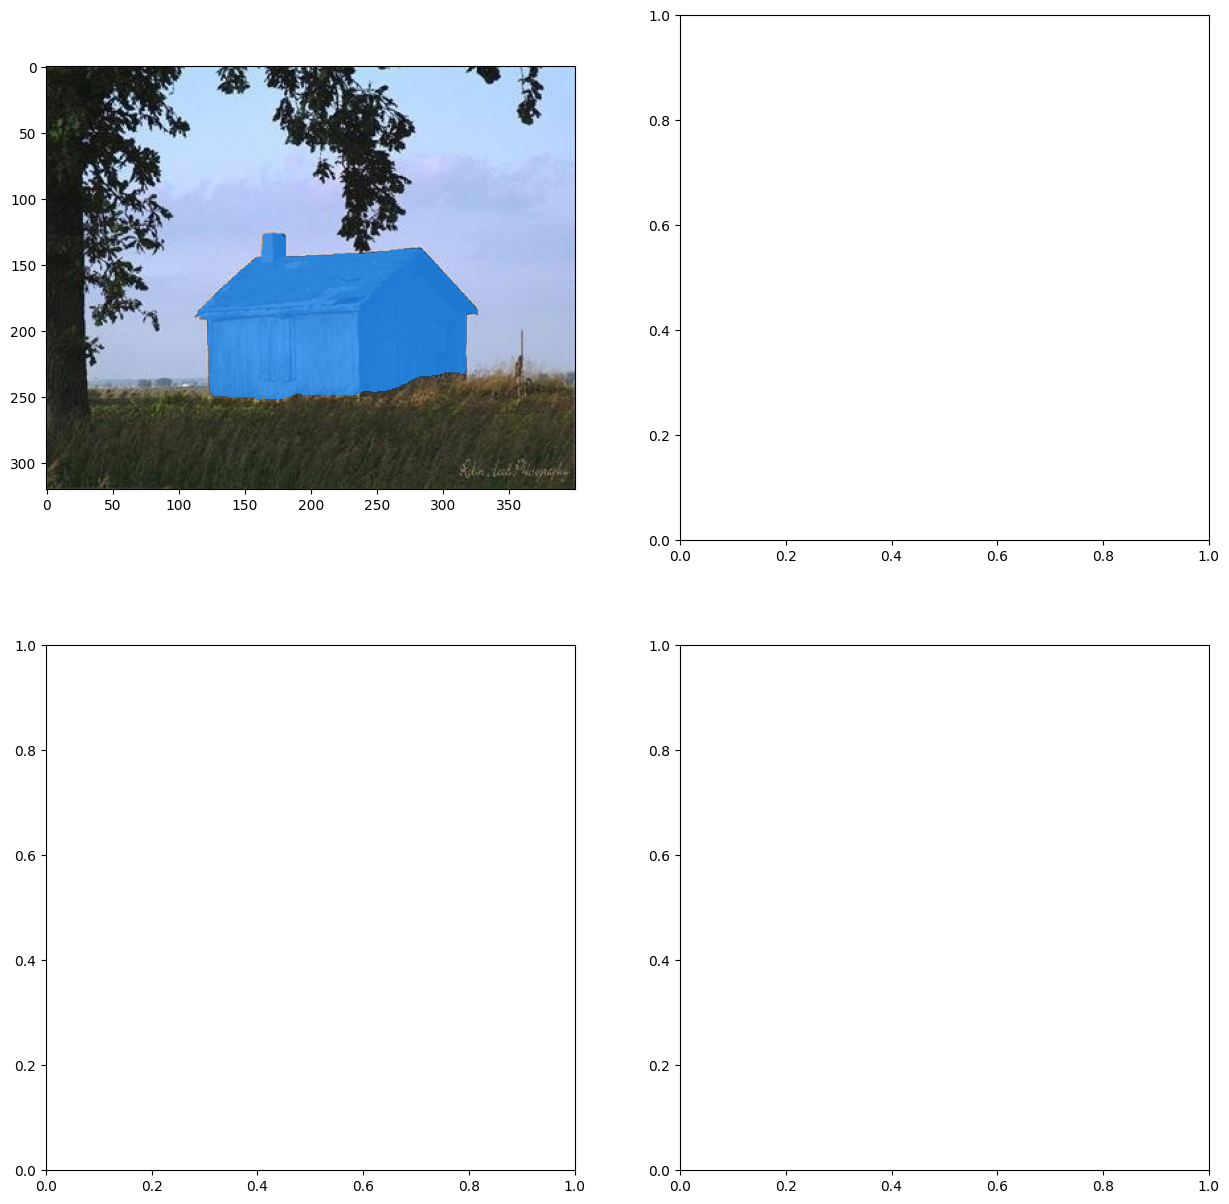

In [15]:
clear_image_path = '/workdir/data/all_data/test/clear/#MSRA_100139.jpg'
prompt = np.array([[270., 177.],[210., 159.]])

masks = SAM_predict(clear_image_path,  prompt)

image = cv2.imread(clear_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0, 0].imshow(image)
show_mask(masks[0][2], ax[0, 0])
masks.shape

In [33]:
提案手法の定義

NameError: name '提案手法の定義' is not defined

In [12]:
%cd ..
%ls

c:\Users\gotol\Documents\nagami\RobustSAM
 �h���C�u C �̃{�����[�� ���x���� Windows �ł�
 �{�����[�� �V���A���ԍ��� 3263-2B0D �ł�

 c:\Users\gotol\Documents\nagami\RobustSAM �̃f�B���N�g��

2025/05/04  16:25    <DIR>          .
2024/12/14  20:32    <DIR>          ..
2024/12/14  20:58    <DIR>          .devcontainer
2024/12/15  14:09    <DIR>          .ipynb_checkpoints
2024/12/17  22:56    <DIR>          .Trash-0
2024/12/23  16:58    <DIR>          __pycache__
2025/05/02  00:41    <DIR>          alpha_analyze
2025/05/02  00:41            11,937 alpha_analyze.py
2025/05/01  15:47            11,974 alpha_analyze_degraded.py
2024/12/24  21:36    <DIR>          checkpoints
2024/12/15  12:56               428 compose.yaml
2024/10/31  12:19    <DIR>          data
2024/12/23  16:58             8,967 dataset.py
2024/10/30  17:19    <DIR>          demo_images
2025/05/04  17:01             1,118 detect_outliers_iqr.py
2024/10/30  19:06               998 Dockerfile
2025/04/30  12:10            10,914

In [13]:
from robust_segment_anything import SamPredictor, sam_model_registry
from robust_segment_anything import SamAutomaticMaskGenerator, sam_model_registry
from robust_segment_anything.utils.transforms import ResizeLongestSide

In [15]:
checkpoint_path = './checkpoints/alpha_beta_gamma_conv_MSRA10k_best.pth'
model_type = "vit_h"
device = "cuda"

model = sam_model_registry[model_type](opt=None, checkpoint=checkpoint_path)

model.to(device=device)

print('Succesfully loading model from {}'.format(checkpoint_path))

propose_predictor= ResizeLongestSide(model.image_encoder.img_size)

c:\Users\gotol\Documents\nagami\RobustSAM\robust_segment_anything\build_sam.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f, map_location='cp

<All keys matched successfully>
Succesfully loading model from ./checkpoints/alpha_beta_gamma_conv_MSRA10k_best.pth


In [16]:
def propose_predict(image_path, prompt,visualaize = False):
    prompt = np.expand_dims(prompt, axis=0) #batchを2で学習してるため
    prompt = np.repeat(prompt, repeats=2, axis=0)#batchを2で学習してるため
    label = torch.ones((prompt.shape[0],prompt.shape[1]))

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_t = torch.tensor(image, dtype=torch.uint8).unsqueeze(0).to(device)
    image_t = torch.permute(image_t, (0, 3, 1, 2))
    image_t = torch.cat([image_t, image_t], dim=0)#batchを2で学習してるため
    image_t_transformed = propose_predictor.apply_image_torch(image_t.float())

    batched_input = []
    
    for i in range(image_t_transformed.shape[0]):
        if len(prompt[0])<=3:
              input_label = torch.Tensor(np.ones(prompt.shape[1])).to(device)
              point_t = torch.Tensor(prompt).to(device)
        
              data_dict = {}
              data_dict['image'] = image_t_transformed[i]
              data_dict['point_coords'] = propose_predictor.apply_coords_torch(point_t[i], image_t.shape[-2:]).unsqueeze(0)
              data_dict['point_labels'] = input_label.unsqueeze(0)
              data_dict['original_size'] = image_t.shape[-2:]
              batched_input.append(data_dict)
        else:
               box_t = torch.Tensor(prompt).to(device)
               data_dict = {}
               data_dict['image'] = image_t_transformed[i]
               data_dict['boxes'] = propose_predictor.apply_boxes_torch(box_t[i], image_t.shape[-2:]).unsqueeze(0)
               data_dict['original_size'] = image_t.shape[-2:]
               batched_input.append(data_dict)
        
    with torch.no_grad():
                batched_output = model(None, batched_input, multimask_output=True, return_logits=False)
    
    mask = batched_output[0]['masks']
    mask = mask > 0.0
    
    return mask 

In [27]:
import os

current_dir = os.getcwd()
print("現在のディレクトリ:", current_dir)


現在のディレクトリ: c:\Users\gotol\Documents\nagami\RobustSAM


In [1]:
clear_image_path = './data/all_data/test/clear/#MSRA_104800.jpg'
masks_path = clear_image_path_to_mask_path(degration_image_path_to_clear_image_path(clear_image_path))
mask = np.load(masks_path)
target = torch.tensor(mask).unsqueeze(1).to('cuda')

#prompt = get_point_prompt(clear_image_path,3)
prompt = get_box_prompt(clear_image_path)
#prompt = np.array([[270., 177.],[210., 159.]])
#prompt = np.array([100, 100, 330, 250])

propose_mask = propose_predict(clear_image_path, prompt,visualaize = False)
RobustSAM_mask = RobustSAM_predict(clear_image_path, prompt)
SAM_mask = SAM_predict(clear_image_path,  prompt)

IoU_score_propose= compute_iou(propose_mask[0][0], mask)
IoU_score_RobustSAM= compute_iou(RobustSAM_mask[0][1], mask)
IoU_score_SAM= compute_iou(SAM_mask[0][1], mask)
print('---------------------------------------------')
print(prompt)

print(IoU_score_propose)
print(IoU_score_RobustSAM)
print(IoU_score_SAM)
print('-------------------------------------------------------')
print(overflow_score(propose_mask[0][0], mask))
print(overflow_score(RobustSAM_mask[0][1], mask))
print(overflow_score(SAM_mask[0][1], mask))

image = cv2.imread(clear_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 4, figsize=(20, 10))


ax[0].imshow(image)
ax[1].imshow(image)
ax[2].imshow(image)
ax[3].imshow(image)
show_mask(propose_mask[0][0], ax[1])
show_mask(RobustSAM_mask[0][1], ax[2])
show_mask(SAM_mask[0][1], ax[3])

NameError: name 'clear_image_path_to_mask_path' is not defined

In [28]:
諸々の関数

NameError: name '諸々の関数' is not defined

In [6]:
def show_boxes(coords, ax):
    x1, y1, x2, y2 = coords
    width = x2-x1
    height = y2-y1
    bbox = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor='r', facecolor='none')
    ax.add_patch(bbox)

def show_points(coords, labels, ax, marker_size=100):
    pos_points = coords[labels == 1]
    neg_points = coords[labels == 0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.8])

    h, w = mask.shape[-2:]
    mask = mask.detach().cpu().numpy()
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

In [7]:
import shutil
import os
def clear_image_path_to_mask_path(clear_image_path:str) -> str:
    source_dir= './data/all_data/test/clear'
    destination_dir='./data/all_data/test/masks'
    file_name=os.path.basename(clear_image_path)
    # ファイル名の拡張子を変更する
    new_file_name = os.path.splitext(file_name)[0] + '.npy'
    masks_path = os.path.join(destination_dir, new_file_name)

    return masks_path

def clear_image_path_to_degration_image_path(clear_image_path:str, degration_type:str) -> str:
    file_name = os.path.basename(clear_image_path)
    # 新しいパスを作成
    degration_image_path = os.path.join('./data/all_data/test', degration_type, file_name)
    return degration_image_path

def degration_image_path_to_clear_image_path(degration_image_path: str) -> str:
    file_name = os.path.basename(degration_image_path)  # ファイル名を取得
    # 新しいパスを作成
    clear_image_path = os.path.join('./data/all_data/test', 'clear', file_name)
    return clear_image_path

In [19]:
clear_image_path = '/workdir/data/all_data/test/clear/#MSRA_100139.jpg'
mask_path = clear_image_path_to_mask_path(clear_image_path)
mask_path

'./data/all_data/test/masks\\#MSRA_100139.npy'

In [5]:
degration_image_path = '/workdir/data/all_data/test/rain/#MSRA_100139.jpg'
degration_image_path =degration_image_path_to_clear_image_path(clear_image_path)
degration_image_path

'/workdir/data/all_data/test/clear/#MSRA_100139.jpg'

In [8]:
import random
def get_point_prompt(clear_image_path, num_points):
        masks_path = clear_image_path_to_mask_path(clear_image_path)
        mask = np.load(masks_path)
        input_point = []
        index = np.where(mask == True)
        y_coord_np = index[1]
        x_coord_np = index[2]
        index_list = range(0, len(x_coord_np))
        first_index_list = range(0, int(len(x_coord_np)/2))
        second_index_list = range(int(len(x_coord_np)/2), len(x_coord_np))

        if num_points == 2:
            first_index = random.sample(first_index_list, 1)
            second_index = random.sample(second_index_list, 1)
            coord = [int(x_coord_np[first_index]), int(y_coord_np[first_index])]
            input_point.append(coord)
            coord = [int(x_coord_np[second_index]), int(y_coord_np[second_index])]
            input_point.append(coord)

        else:
            index = random.sample(index_list, num_points)
            for i in index:
                coord = [x_coord_np[i], y_coord_np[i]]
                input_point.append(coord)

        input_point = np.array(input_point)

        return input_point

def get_box_prompt(clear_image_path):
        masks_path = clear_image_path_to_mask_path(clear_image_path)
        mask = np.load(masks_path)
        index = np.where(mask == 1)
        y_coord_np = index[1]
        x_coord_np = index[2]
        x_upper_left = np.min(x_coord_np)-10 - random.randint(0, 10)
        y_upper_left = np.min(y_coord_np)-10 - random.randint(0, 10)
        x_lower_right = np.max(x_coord_np)+10 + random.randint(0, 10)
        y_lower_right = np.max(y_coord_np)+10 + random.randint(0, 10)
        if x_upper_left < 0:
            x_upper_left = 0
        if y_upper_left < 0:
            y_upper_left = 0
        if x_lower_right > mask.shape[2]:
            x_lower_right = mask.shape[2]
        if y_lower_right > mask.shape[1]:
            y_lower_right = mask.shape[1]
        prompt = np.array([x_upper_left, y_upper_left , x_lower_right , y_lower_right])
        return prompt

In [455]:
prompt = get_point_prompt(clear_image_path,3)
prompt = np.expand_dims(prompt, axis=0) #batchを2で学習してるため
prompt = np.repeat(prompt, repeats=2, axis=0)#batchを2で学習してるため
label = torch.ones((prompt.shape[0],prompt.shape[1]))
input_label = torch.Tensor(np.ones(prompt.shape[1])).to(device)
point_t= torch.Tensor(prompt).to(device)
print(point_t)
print(point_t.shape)
print(input_label.shape)
box = get_box_prompt(clear_image_path)
print(box)

tensor([[[203., 225.],
         [273., 153.],
         [205., 248.]],

        [[203., 225.],
         [273., 153.],
         [205., 248.]]], device='cuda:0')
torch.Size([2, 3, 2])
torch.Size([3])
[100 109 337 269]


In [27]:
#def mask_iou(pred_label, label):
    '''
    calculate mask iou for pred_label and gt_label
    '''
    pred_label = (pred_label > 0)[0].int()
    label = (label > 0)[0].int() # 元コードではなぜか128より大きい場合になっていたが，今回は.npyで保存されている正解マスクが0/1なので，1を検出する仕様にした

    intersection = ((label * pred_label) > 0).sum().item()
    union = ((label + pred_label) > 0).sum().item()

    #print(f'Intersection: {intersection}, Union: {union}')  # デバッグ出力

    if union == 0:
        return 0.0
    return intersection / union

#def compute_iou(preds, target):
    assert target.shape[1] == 1, 'only support one mask per image now'

    device = preds.device
    target = target.to(device)

    if(preds.shape[2] != target.shape[2] or preds.shape[3] != target.shape[3]):
        postprocess_preds = F.interpolate(preds, size=target.size()[2:], mode='bilinear', align_corners=False)
    else:
        postprocess_preds = preds

    iou = 0
    for i in range(len(preds)):
        iou += mask_iou(postprocess_preds[i], target[i])

    return iou / len(preds)

IndentationError: unexpected indent (3693977769.py, line 2)

In [23]:
def compute_iou(preds, mask):
    intersection = np.logical_and(preds.cpu().numpy(), mask).sum()
    union = np.logical_or(preds.cpu().numpy(), mask).sum()
    iou = intersection / union if union > 0 else 0
    
    return iou

In [34]:
clear_image_path = '/workdir/data/all_data/test/clear/#MSRA_100139.jpg'
prompt = get_point_prompt(clear_image_path,2)
masks_path = clear_image_path_to_mask_path(clear_image_path)
mask = np.load(masks_path)
target = torch.tensor(mask).unsqueeze(1).to('cuda')

propose_mask = propose_predict(clear_image_path, prompt,visualaize = False)
RobustSAM_mask = RobustSAM_predict(clear_image_path, prompt,visualaize = False)
SAM_mask = SAM_predict(clear_image_path, prompt,visualaize = False)

IoU_score_propose= compute_iou(propose_mask[0][0], mask)
IoU_score_RobustSAM= compute_iou(RobustSAM_mask[0][0], mask)
IoU_score_SAM= compute_iou(SAM_mask[0][2], mask)

print(IoU_score_propose)
print(IoU_score_RobustSAM)
print(IoU_score_SAM)
propose_mask.shape

0.9621307506053268
0.9531857031857032
0.9429088596448315


torch.Size([1, 15, 320, 400])

In [24]:
from scipy.ndimage import binary_dilation
def overflow_score(preds, mask):
    #masks_path = clear_image_path_to_mask_path(clear_image_path)
    #mask = np.load(masks_path)
    target = torch.tensor(mask).unsqueeze(1).to('cuda')
    mask_tensor = torch.from_numpy(mask).int().to('cuda')
    # 膨張処理のためのカーネルを定義 (5x5の構造要素)
    structure = np.ones((5, 5), dtype=np.uint8)
    # 膨張処理を行う
    dilated_mask = binary_dilation(mask[0], structure=structure).astype(np.uint8)
    # 元の形状 (1, H, W) に戻す
    dilated_mask = dilated_mask[np.newaxis, ...]
    edge_mask= dilated_mask - mask
    edge_mask_tensor = torch.from_numpy(edge_mask).int().to('cuda')

    preds = preds.int().to('cuda')
    
    predict_edge_mask = preds - mask_tensor[0]

    predict_outside_mask = predict_edge_mask * edge_mask_tensor[0]
    
    non_zero_values = predict_outside_mask[predict_outside_mask != 0]
      
    edge_mask_tensor_non_zero_values = edge_mask_tensor[edge_mask_tensor != 0]
    
    protrud_sum=non_zero_values.sum()
    
    edge_sum=edge_mask_tensor_non_zero_values.sum()
    
    return float(protrud_sum/edge_sum)

In [38]:
masks_path = clear_image_path_to_mask_path(clear_image_path)
mask = np.load(masks_path)
target = torch.tensor(mask).unsqueeze(1).to('cuda')
print(overflow_score(propose_mask[0][0], mask))
print(overflow_score(RobustSAM_mask[0][0], mask))
print(overflow_score(SAM_mask[0][2], mask))

0.1597222238779068
0.17430555820465088
0.07152777910232544


実験

In [462]:
clear_image_folder = '/workdir/data/all_data/test/clear'

# フォルダ内のファイルを取得 #画像は5000枚ある
clear_image_files = os.listdir(clear_image_folder)
clear_image_files_MSRA =[]

# ディレクトリ内のファイルをすべて確認
for image_file in clear_image_files:
    # ファイル名に「#MSRA」が含まれているかを確認
    if '#MSRA' in image_file:
        file_path = os.path.join(clear_image_folder, image_file)
        clear_image_files_MSRA.append(file_path)

print(clear_image_files_MSRA[:5])

['/workdir/data/all_data/test/clear/#MSRA_100015.jpg', '/workdir/data/all_data/test/clear/#MSRA_100139.jpg', '/workdir/data/all_data/test/clear/#MSRA_100160.jpg', '/workdir/data/all_data/test/clear/#MSRA_100235.jpg', '/workdir/data/all_data/test/clear/#MSRA_100261.jpg']


In [39]:
import cv2
import os
from PIL import Image
import pandas as pd
from tqdm import tqdm

#プロンプトの点の数
num_points = 2
#劣化の種類 #'clear', 'snow', 'fog', 'rain'
#degration_type = 'contrast'
# 画像フォルダのパスを設定
clear_image_folder = '/workdir/data/all_data/test/clear'

# フォルダ内のファイルを取得 #画像は5000枚ある
clear_image_files = os.listdir(clear_image_folder)
clear_image_files_MSRA =[]

# ディレクトリ内のファイルをすべて確認
for image_file in clear_image_files:
    # ファイル名に「#MSRA」が含まれているかを確認
    if '#MSRA' in image_file:
        file_path = os.path.join(clear_image_folder, image_ifle)
        clear_image_files_MSRA.append(file_path)

# ファイル名をアルファベット順にソート

for k in tqdm(range(5)):
    clear_image_files_MSRA.sort()
    selected_images = clear_image_files_MSRA
    #IoUとoverflow_scoreを保存するリスト
    overflow_score_and_IoU_list = []
# 画像を順番に読み込み
    for image_file in selected_images:
        clear_image_path = os.path.join(clear_image_folder, image_file)
        #prompt = get_point_prompt(clear_image_path, num_points)
        prompt = get_box_prompt(clear_image_path)
    
        propose_mask = propose_predict(clear_image_path, prompt)
        RobustSAM_mask = RobustSAM_predict(clear_image_path, prompt)
        SAM_mask = SAM_predict(clear_image_path,  prompt)
    
        IoU_score_propose_best, IoU_score_RobustSAM_best, IoU_score_SAM_best = 0, 0, 0

        masks_path = clear_image_path_to_mask_path(clear_image_path)
        mask = np.load(masks_path)
        target = torch.tensor(mask).unsqueeze(1).to('cuda')
        
        #iou_propose =  compute_iou(propose_mask, target)
        #iou_RobustSAM =  compute_iou(RobustSAM_mask, target)
        #iou_SAM =  compute_iou(SAM_mask, target)
        
        #overflow_score_propose, overflow_score_RobustSAM, overflow_score_SAM = 0, 0, 0
        
        for i in range(0, 15):
            iou_propose = compute_iou(propose_mask[0][i], mask) 
            iou_RobustSAM = compute_iou(RobustSAM_mask[0][i], mask)
            if iou_propose > IoU_score_propose_best:
                IoU_score_propose_best = iou_propose
                index_propose = i
            if  iou_RobustSAM > IoU_score_RobustSAM_best:
                IoU_score_RobustSAM_best = iou_RobustSAM
                index_RobustSAM = i
    
        for j in range(0, 3):
            iou_SAM = compute_iou(SAM_mask[0][j], mask)
            if iou_SAM > IoU_score_SAM_best:
                IoU_score_SAM_best = iou_SAM
                index_SAM = j
        
        overflow_score_propose = overflow_score(propose_mask[0][index_propose], mask)
        overflow_score_RobustSAM = overflow_score(RobustSAM_mask[0][index_RobustSAM], mask)
        overflow_score_SAM = overflow_score(SAM_mask[0][index_SAM], mask)
        
        overflow_score_and_IoU_list.append([clear_image_path,IoU_score_propose_best, IoU_score_RobustSAM_best, IoU_score_SAM_best, overflow_score_propose, overflow_score_RobustSAM, overflow_score_SAM])

    csv_filename = f"clear_score{k}_box.csv"
    %cd /workdir/IoU_overflow_score/box_clear_conv_MSRA
      # CSVファイルとして保存
    if os.path.exists(csv_filename):
        # ファイルが存在する場合、追記モードでデータを追加
        df = pd.DataFrame(overflow_score_and_IoU_list)
        df.to_csv(csv_filename, mode='a', header=False, index=False)
    else:
        # ファイルが存在しない場合、新しく作成してデータを保存
        df = pd.DataFrame(overflow_score_and_IoU_list, columns=['clear_image_path','IoU_score_propose', 'IoU_score_RobustSAM', 'IoU_score_SAM','overflow_score_propose', 'overflow_score_RobustSAM','overflow_score_SAM'])
        df.to_csv(csv_filename, index=False)

  0%|                                                                                                | 0/5 [00:00<?, ?it/s]/root/.pyenv/versions/3.10.5/lib/python3.10/site-packages/torch/nn/modules/instancenorm.py:115: UserWarning: input's size at dim=0 does not match num_features. You can silence this warning by not passing in num_features, which is not used because affine=False
  warnings.warn(
/root/.pyenv/versions/3.10.5/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
 20%|████████████████▊                                                                   | 1/5 [32:38<2:10:33, 1958.35s/it]

/workdir/IoU_overflow_score/box_clear_conv_MSRA


 40%|████████████████████████████████▊                                                 | 2/5 [1:04:55<1:37:16, 1945.65s/it]

/workdir/IoU_overflow_score/box_clear_conv_MSRA


 60%|█████████████████████████████████████████████████▏                                | 3/5 [1:37:13<1:04:44, 1942.29s/it]

/workdir/IoU_overflow_score/box_clear_conv_MSRA


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [2:09:29<32:19, 1939.95s/it]

/workdir/IoU_overflow_score/box_clear_conv_MSRA


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [2:41:48<00:00, 1941.66s/it]

/workdir/IoU_overflow_score/box_clear_conv_MSRA


In [41]:
import os
import pandas as pd

# フォルダのパス
folder_path = '/workdir/IoU_overflow_score/box_clear_conv_MSRA/'

# フォルダ内のCSVファイルを処理
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        # CSVを読み込み（1列目を除く）
        data = pd.read_csv(file_path)
        if data.shape[1] > 1:  # 1列目以外の列が存在する場合
            column_means = data.iloc[:, 1:].mean(axis=0)  # 各列の平均を計算
            print(f"{file_name} の列ごとの平均:")
            print(column_means)
            print("-" * 40)




clear_score0_box.csv の列ごとの平均:
IoU_score_propose           0.901685
IoU_score_RobustSAM         0.900328
IoU_score_SAM               0.911935
overflow_score_propose      0.355143
overflow_score_RobustSAM    0.434766
overflow_score_SAM          0.163004
dtype: float64
----------------------------------------
clear_score1_box.csv の列ごとの平均:
IoU_score_propose           0.901903
IoU_score_RobustSAM         0.900625
IoU_score_SAM               0.912859
overflow_score_propose      0.353715
overflow_score_RobustSAM    0.434651
overflow_score_SAM          0.163615
dtype: float64
----------------------------------------
clear_score2_box.csv の列ごとの平均:
IoU_score_propose           0.901131
IoU_score_RobustSAM         0.899632
IoU_score_SAM               0.911527
overflow_score_propose      0.355641
overflow_score_RobustSAM    0.437536
overflow_score_SAM          0.163529
dtype: float64
----------------------------------------
clear_score3_box.csv の列ごとの平均:
IoU_score_propose           0.900713
IoU_score

In [421]:
import pandas as pd
import glob

# CSVファイルのパスをリスト化 (全てのCSVファイルを対象にする場合)
csv_files = glob.glob("/workdir/IoU_overflow_score/point_2_clear_conv/*.csv")  # パスを適切に変更

# データフレームを格納するリスト
data_frames = []

# 各CSVファイルを読み込む
for file in csv_files:
    try:
        df = pd.read_csv(file)
        print(f"Loaded: {file}")
        
        # 1列目を除外してデータフレームを格納
        df_excluded = df.iloc[:, 1:]  # 2列目以降を選択
        data_frames.append(df_excluded)
    except Exception as e:
        print(f"Error loading {file}: {e}")
# データフレームを結合
combined_df = pd.concat(data_frames, ignore_index=True)

# 列ごとの平均と分散を計算 (1列目は除外済み)
mean = combined_df.mean()
variance = combined_df.var()

# 結果を表示
print("列ごとの平均 (1列目除外):")
print(mean)

print("\n列ごとの分散 (1列目除外):")
print(variance)

Loaded: /workdir/IoU_overflow_score/point_2_clear_conv/clear_score0_point.csv
Loaded: /workdir/IoU_overflow_score/point_2_clear_conv/clear_score1_point.csv
Loaded: /workdir/IoU_overflow_score/point_2_clear_conv/clear_score2_point.csv
Loaded: /workdir/IoU_overflow_score/point_2_clear_conv/clear_score3_point.csv
Loaded: /workdir/IoU_overflow_score/point_2_clear_conv/clear_score4_point.csv
列ごとの平均 (1列目除外):
IoU_score_propose           0.893179
IoU_score_RobustSAM         0.897526
IoU_score_SAM               0.876754
overflow_score_propose      0.210191
overflow_score_RobustSAM    0.294313
overflow_score_SAM          0.141628
dtype: float64

列ごとの分散 (1列目除外):
IoU_score_propose           0.016606
IoU_score_RobustSAM         0.012459
IoU_score_SAM               0.024097
overflow_score_propose      0.019778
overflow_score_RobustSAM    0.027002
overflow_score_SAM          0.020645
dtype: float64


In [40]:
import os
import random
import cv2
from PIL import Image
import pandas as pd
from tqdm import tqdm

# 対象のフォルダー
folders = [
    "/workdir/data/all_data/test/snow",
    "/workdir/data/all_data/test/fog",
    "/workdir/data/all_data/test/rain"
]
print('------------------------------------------------------------')
# 結果を格納するリスト
selected_files = []

# 2000回繰り返す
for _ in range(2000):
    while True:
        # ランダムにフォルダーを選択
        selected_folder = random.choice(folders)
        
        # フォルダー内のファイル一覧を取得
        files = os.listdir(selected_folder)
        
        # `#MSRA` を含むファイルをフィルタリング
        msra_files = [file for file in files if "#MSRA" in file]
        
        # 該当するファイルが存在する場合、ランダムに選択
        if msra_files:
            selected_file = random.choice(msra_files)
            selected_files.append(os.path.join(selected_folder, selected_file))
            break  # 次のループに進む



#プロンプトの点の数
num_points = 2

# ファイル名をアルファベット順にソート

for k in tqdm(range(5)):
    #IoUとoverflow_scoreを保存するリスト
    overflow_score_and_IoU_list = []
# 画像を順番に読み込み
    for image_file in selected_files:
        #prompt = get_point_prompt(image_file, num_points)
        prompt = get_box_prompt(image_file)
    
        propose_mask = propose_predict(image_file, prompt)
        RobustSAM_mask = RobustSAM_predict(image_file, prompt)
        SAM_mask = SAM_predict(image_file,  prompt)
    
        IoU_score_propose_best, IoU_score_RobustSAM_best, IoU_score_SAM_best = 0, 0, 0

        clear_image_path = degration_image_path_to_clear_image_path(image_file)

        masks_path = clear_image_path_to_mask_path(clear_image_path)
        mask = np.load(masks_path)
        target = torch.tensor(mask).unsqueeze(1).to('cuda')
        
        #iou_propose =  compute_iou(propose_mask, target)
        #iou_RobustSAM =  compute_iou(RobustSAM_mask, target)
        #iou_SAM =  compute_iou(SAM_mask, target)
        
        #overflow_score_propose, overflow_score_RobustSAM, overflow_score_SAM = 0, 0, 0
        
        for i in range(0, 15):
            iou_propose = compute_iou(propose_mask[0][i], mask) 
            iou_RobustSAM = compute_iou(RobustSAM_mask[0][i], mask)
            if iou_propose > IoU_score_propose_best:
                IoU_score_propose_best = iou_propose
                index_propose = i
            if  iou_RobustSAM > IoU_score_RobustSAM_best:
                IoU_score_RobustSAM_best = iou_RobustSAM
                index_RobustSAM = i
    
        for j in range(0, 3):
            iou_SAM = compute_iou(SAM_mask[0][j], mask)
            if iou_SAM > IoU_score_SAM_best:
                IoU_score_SAM_best = iou_SAM
                index_SAM = j
        
        overflow_score_propose = overflow_score(propose_mask[0][index_propose], mask)
        overflow_score_RobustSAM = overflow_score(RobustSAM_mask[0][index_RobustSAM], mask)
        overflow_score_SAM = overflow_score(SAM_mask[0][index_SAM], mask)
        
        overflow_score_and_IoU_list.append([image_file,IoU_score_propose_best, IoU_score_RobustSAM_best, IoU_score_SAM_best, overflow_score_propose, overflow_score_RobustSAM, overflow_score_SAM])

    csv_filename = f"degrade_score{k}_box.csv"
    %cd /workdir/IoU_overflow_score/box_degrade_conv_MSRA
      # CSVファイルとして保存
    if os.path.exists(csv_filename):
        # ファイルが存在する場合、追記モードでデータを追加
        df = pd.DataFrame(overflow_score_and_IoU_list)
        df.to_csv(csv_filename, mode='a', header=False, index=False)
    else:
        # ファイルが存在しない場合、新しく作成してデータを保存
        df = pd.DataFrame(overflow_score_and_IoU_list, columns=['clear_image_path','IoU_score_propose', 'IoU_score_RobustSAM', 'IoU_score_SAM','overflow_score_propose', 'overflow_score_RobustSAM','overflow_score_SAM'])
        df.to_csv(csv_filename, index=False)

------------------------------------------------------------


 20%|████████████████▊                                                                   | 1/5 [32:26<2:09:47, 1946.91s/it]

/workdir/IoU_overflow_score/box_degrade_conv_MSRA


 40%|████████████████████████████████▊                                                 | 2/5 [1:04:47<1:37:09, 1943.00s/it]

/workdir/IoU_overflow_score/box_degrade_conv_MSRA


 60%|█████████████████████████████████████████████████▏                                | 3/5 [1:37:06<1:04:42, 1941.38s/it]

/workdir/IoU_overflow_score/box_degrade_conv_MSRA


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [2:09:26<32:20, 1940.89s/it]

/workdir/IoU_overflow_score/box_degrade_conv_MSRA


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [2:41:46<00:00, 1941.24s/it]

/workdir/IoU_overflow_score/box_degrade_conv_MSRA


In [42]:
import os
import pandas as pd

# フォルダのパス
folder_path = '/workdir/IoU_overflow_score/box_degrade_conv_MSRA'

# フォルダ内のCSVファイルを処理
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        # CSVを読み込み（1列目を除く）
        data = pd.read_csv(file_path)
        if data.shape[1] > 1:  # 1列目以外の列が存在する場合
            column_means = data.iloc[:, 1:].mean(axis=0)  # 各列の平均を計算
            print(f"{file_name} の列ごとの平均:")
            print(column_means)
            print("-" * 40)

degrade_score0_box.csv の列ごとの平均:
IoU_score_propose           0.876592
IoU_score_RobustSAM         0.885605
IoU_score_SAM               0.908477
overflow_score_propose      0.424335
overflow_score_RobustSAM    0.441182
overflow_score_SAM          0.176049
dtype: float64
----------------------------------------
degrade_score1_box.csv の列ごとの平均:
IoU_score_propose           0.877236
IoU_score_RobustSAM         0.886018
IoU_score_SAM               0.907985
overflow_score_propose      0.425385
overflow_score_RobustSAM    0.442043
overflow_score_SAM          0.174672
dtype: float64
----------------------------------------
degrade_score2_box.csv の列ごとの平均:
IoU_score_propose           0.877419
IoU_score_RobustSAM         0.886249
IoU_score_SAM               0.908332
overflow_score_propose      0.422524
overflow_score_RobustSAM    0.439850
overflow_score_SAM          0.174403
dtype: float64
----------------------------------------
degrade_score3_box.csv の列ごとの平均:
IoU_score_propose           0.878720
I